In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

#den oberen Teil kennt man schon vom letzten Mal...
#Theano kommt neu dazu - 
#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#Jetzt noch scikit-learn:
#hier stecken viele Funktionalitäten drin, die man gut brauchen kann: 
#Fehlerfunktionen, Standard-Modelltypen, Preprocessing-Algorithmen, Daten... 

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
#Import wichtiger Keras Funktionalitäten

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.utils import to_categorical
from keras.optimizers import SGD #Stochastic Gradient Descent
from keras.utils import plot_model

import pickle

In [49]:
# prepare gray scale data
data_gray_file = open('./archiv/data6.pickle', 'rb')
data_gray = pickle.load(data_gray_file, encoding='latin1')
data_gray_file.close()

# Preparing y_train and y_validation for use in Keras
data_gray['y_train'] = to_categorical(data_gray['y_train'], num_classes=43)
data_gray['y_validation'] = to_categorical(data_gray['y_validation'], num_classes=43)


# prepare color data
data_color_file = open('./archiv/data1.pickle', 'rb')
data_color = pickle.load(data_color_file, encoding='latin1')
data_color_file.close()

# Preparing y_train and y_validation for use in Keras
data_color['y_train'] = to_categorical(data_color['y_train'], num_classes=43)
data_color['y_validation'] = to_categorical(data_color['y_validation'], num_classes=43)

In [50]:
# Transpose data to have channel at the end
x_train_gray = data_gray['x_train'].transpose(0, 2, 3, 1)
x_train_color = data_color['x_train'].transpose(0, 2, 3, 1)

x_test_gray = data_gray['x_test'].transpose(0, 2, 3, 1)
x_test_color = data_color['x_test'].transpose(0, 2, 3, 1)

x_validation_gray = data_gray['x_validation'].transpose(0, 2, 3, 1)
x_validation_color = data_color['x_validation'].transpose(0, 2, 3, 1)

# one hot encoding
#y_train_gray = to_categorical(data_gray['y_train'], num_classes=43)
y_train_gray = data_gray['y_train']
y_train_color = to_categorical(data_color['y_train'], num_classes=43)
y_test_gray = to_categorical(data_gray['y_test'], num_classes=43)
#y_test_gray = data_gray['y_test']
y_test_color = to_categorical(data_color['y_test'], num_classes=43)

print('x_train_gray.shape: ' + str(x_train_gray.shape))
print('x_train_color.shape: ' + str(x_train_color.shape))
print('x_test_gray.shape: ' + str(x_test_gray.shape))
print('x_test_color.shape: ' + str(x_test_color.shape))


print('y_train_gray.shape: ' + str(y_train_gray.shape))
print('y_train_color.shape: ' + str(y_train_color.shape))
print('y_test_gray.shape: ' + str(y_test_gray.shape))
print('y_test_color.shape: ' + str(y_test_color.shape))

x_train_gray.shape: (86989, 32, 32, 1)
x_train_color.shape: (86989, 32, 32, 3)
x_test_gray.shape: (12630, 32, 32, 1)
x_test_color.shape: (12630, 32, 32, 3)
y_train_gray.shape: (86989, 43)
y_train_color.shape: (86989, 43, 43)
y_test_gray.shape: (12630, 43)
y_test_color.shape: (12630, 43)


In [39]:
# def plotConfusionMatrix(y_true, y_pred):
    # y_pred1 = np.argmax(y_pred, axis=1)
    #y_true1=np.argmax(y_true, axis=1)

    #cm = confusion_matrix(y_true=y_true1, y_pred=y_pred1)

    #plt.figure(figsize=(14,12))
    #sns.heatmap(cm, cmap=mpl.cm.Blues)

# 3 Layer MLP
Daten reshapen damit sie als Vektor statt als 4D Array vorliegen

In [51]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 1*32*32)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 1*32*32)
x_validation = x_validation_gray.reshape(x_validation_gray.shape[0], 1*32*32)

print(x_train_gray.shape)

(86989, 1024)


Epoch 1/20
680/680 [==============================] - 5s 5ms/step - loss: 0.0881 - accuracy: 0.4622 - val_loss: 0.0567 - val_accuracy: 0.6251
Epoch 2/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0444 - accuracy: 0.7723 - val_loss: 0.0411 - val_accuracy: 0.7610
Epoch 3/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0333 - accuracy: 0.8393 - val_loss: 0.0344 - val_accuracy: 0.8017
Epoch 4/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0280 - accuracy: 0.8690 - val_loss: 0.0327 - val_accuracy: 0.8147
Epoch 5/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0246 - accuracy: 0.8855 - val_loss: 0.0305 - val_accuracy: 0.8320
Epoch 6/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0223 - accuracy: 0.8968 - val_loss: 0.0304 - val_accuracy: 0.8369
Epoch 7/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0206 - accuracy: 0.9058 - val_loss: 0.0288 - val_accuracy: 0.8420
Epoch 

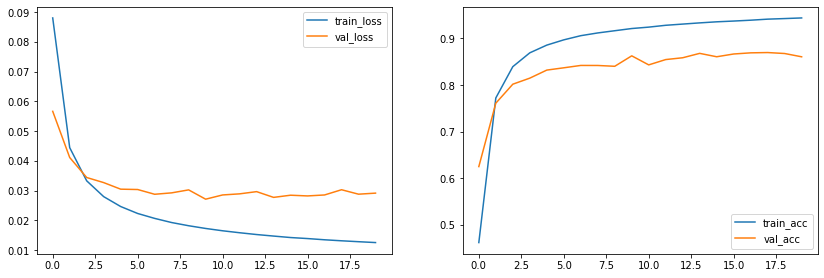

In [58]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=20, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Vergleich mehrerer Aktivierungsfunktionen - relu

Epoch 1/200
680/680 [==============================] - 6s 5ms/step - loss: 0.0905 - accuracy: 0.4381 - val_loss: 0.0600 - val_accuracy: 0.5962
Epoch 2/200
680/680 [==============================] - 3s 5ms/step - loss: 0.0458 - accuracy: 0.7729 - val_loss: 0.0424 - val_accuracy: 0.7405
Epoch 3/200
680/680 [==============================] - 3s 5ms/step - loss: 0.0345 - accuracy: 0.8388 - val_loss: 0.0360 - val_accuracy: 0.7967
Epoch 4/200
680/680 [==============================] - 3s 5ms/step - loss: 0.0293 - accuracy: 0.8651 - val_loss: 0.0336 - val_accuracy: 0.8070
Epoch 5/200
680/680 [==============================] - 3s 4ms/step - loss: 0.0260 - accuracy: 0.8802 - val_loss: 0.0314 - val_accuracy: 0.8234
Epoch 6/200
680/680 [==============================] - 3s 4ms/step - loss: 0.0237 - accuracy: 0.8914 - val_loss: 0.0328 - val_accuracy: 0.8230
Epoch 7/200
680/680 [==============================] - 4s 6ms/step - loss: 0.0219 - accuracy: 0.8990 - val_loss: 0.0302 - val_accuracy: 0.8386

Epoch 58/200
680/680 [==============================] - 3s 5ms/step - loss: 0.0086 - accuracy: 0.9665 - val_loss: 0.0405 - val_accuracy: 0.8793
Epoch 59/200
680/680 [==============================] - 4s 6ms/step - loss: 0.0085 - accuracy: 0.9668 - val_loss: 0.0405 - val_accuracy: 0.8618
Epoch 60/200
680/680 [==============================] - 4s 5ms/step - loss: 0.0085 - accuracy: 0.9662 - val_loss: 0.0395 - val_accuracy: 0.8715
Epoch 61/200
680/680 [==============================] - 3s 5ms/step - loss: 0.0084 - accuracy: 0.9668 - val_loss: 0.0406 - val_accuracy: 0.8636
Epoch 62/200
680/680 [==============================] - 3s 5ms/step - loss: 0.0084 - accuracy: 0.9673 - val_loss: 0.0490 - val_accuracy: 0.8644
Epoch 63/200
680/680 [==============================] - 3s 5ms/step - loss: 0.0083 - accuracy: 0.9674 - val_loss: 0.0441 - val_accuracy: 0.8650
Epoch 64/200
680/680 [==============================] - 3s 5ms/step - loss: 0.0082 - accuracy: 0.9681 - val_loss: 0.0401 - val_accuracy:

Epoch 115/200
680/680 [==============================] - 5s 7ms/step - loss: 0.0067 - accuracy: 0.9759 - val_loss: 0.0539 - val_accuracy: 0.8690
Epoch 116/200
680/680 [==============================] - 6s 8ms/step - loss: 0.0067 - accuracy: 0.9758 - val_loss: 0.0544 - val_accuracy: 0.8633
Epoch 117/200
680/680 [==============================] - 5s 7ms/step - loss: 0.0067 - accuracy: 0.9758 - val_loss: 0.0638 - val_accuracy: 0.8599
Epoch 118/200
680/680 [==============================] - 4s 7ms/step - loss: 0.0066 - accuracy: 0.9764 - val_loss: 0.0492 - val_accuracy: 0.8695
Epoch 119/200
680/680 [==============================] - 5s 7ms/step - loss: 0.0066 - accuracy: 0.9760 - val_loss: 0.0553 - val_accuracy: 0.8560
Epoch 120/200
680/680 [==============================] - 5s 7ms/step - loss: 0.0066 - accuracy: 0.9756 - val_loss: 0.0557 - val_accuracy: 0.8651
Epoch 121/200
680/680 [==============================] - 4s 7ms/step - loss: 0.0066 - accuracy: 0.9762 - val_loss: 0.0530 - val_ac

680/680 [==============================] - 4s 6ms/step - loss: 0.0059 - accuracy: 0.9793 - val_loss: 0.0632 - val_accuracy: 0.8700
Epoch 172/200
680/680 [==============================] - 4s 6ms/step - loss: 0.0058 - accuracy: 0.9805 - val_loss: 0.0630 - val_accuracy: 0.8627
Epoch 173/200
680/680 [==============================] - 5s 7ms/step - loss: 0.0059 - accuracy: 0.9803 - val_loss: 0.0748 - val_accuracy: 0.8643
Epoch 174/200
680/680 [==============================] - 4s 6ms/step - loss: 0.0058 - accuracy: 0.9807 - val_loss: 0.0657 - val_accuracy: 0.8667
Epoch 175/200
680/680 [==============================] - 4s 6ms/step - loss: 0.0058 - accuracy: 0.9806 - val_loss: 0.0657 - val_accuracy: 0.8673
Epoch 176/200
680/680 [==============================] - 4s 6ms/step - loss: 0.0058 - accuracy: 0.9800 - val_loss: 0.0619 - val_accuracy: 0.8656
Epoch 177/200
680/680 [==============================] - 4s 6ms/step - loss: 0.0058 - accuracy: 0.9802 - val_loss: 0.0649 - val_accuracy: 0.8626

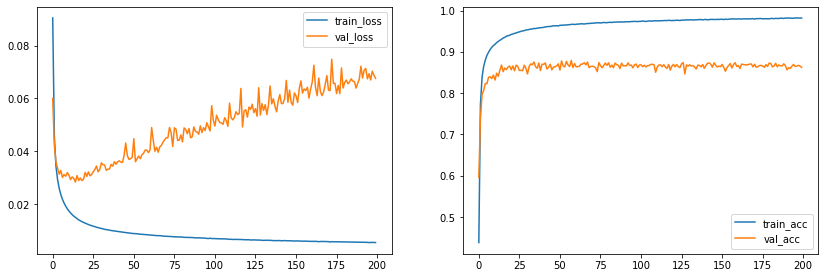

In [59]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=200, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# Vergleich mehrerer Aktivierungsfunktionen - Sigmoid

Epoch 1/20
680/680 [==============================] - 5s 6ms/step - loss: 0.0993 - accuracy: 0.3450 - val_loss: 0.0684 - val_accuracy: 0.5687
Epoch 2/20
680/680 [==============================] - 3s 5ms/step - loss: 0.0544 - accuracy: 0.7317 - val_loss: 0.0459 - val_accuracy: 0.7256
Epoch 3/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0394 - accuracy: 0.8203 - val_loss: 0.0373 - val_accuracy: 0.7866
Epoch 4/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0322 - accuracy: 0.8548 - val_loss: 0.0331 - val_accuracy: 0.8077
Epoch 5/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0279 - accuracy: 0.8749 - val_loss: 0.0300 - val_accuracy: 0.8188
Epoch 6/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0248 - accuracy: 0.8886 - val_loss: 0.0280 - val_accuracy: 0.8426
Epoch 7/20
680/680 [==============================] - 3s 4ms/step - loss: 0.0225 - accuracy: 0.8998 - val_loss: 0.0268 - val_accuracy: 0.8489
Epoch 

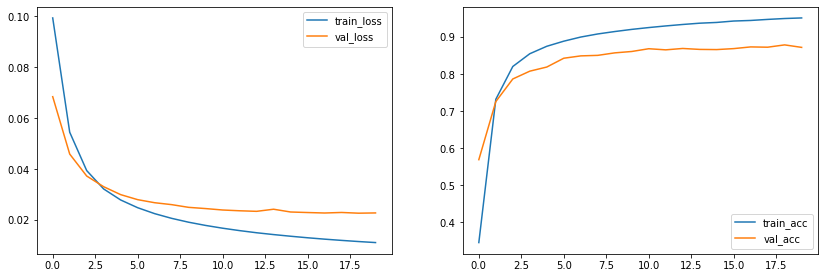

In [60]:
# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='sigmoid', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=20, #Anzahl Trainingsepochen
          batch_size=128, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])

# New Optimizer Adam

Epoch 1/120
435/435 [==============================] - 3s 6ms/step - loss: 0.1233 - accuracy: 0.2099 - val_loss: 0.0907 - val_accuracy: 0.3867
Epoch 2/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0741 - accuracy: 0.5890 - val_loss: 0.0627 - val_accuracy: 0.6283
Epoch 3/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0538 - accuracy: 0.7306 - val_loss: 0.0494 - val_accuracy: 0.7068
Epoch 4/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0434 - accuracy: 0.7913 - val_loss: 0.0427 - val_accuracy: 0.7504
Epoch 5/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0373 - accuracy: 0.8252 - val_loss: 0.0384 - val_accuracy: 0.7827
Epoch 6/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0332 - accuracy: 0.8493 - val_loss: 0.0369 - val_accuracy: 0.7909
Epoch 7/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.8629 - val_loss: 0.0348 - val_accuracy: 0.8124

Epoch 58/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0120 - accuracy: 0.9490 - val_loss: 0.0317 - val_accuracy: 0.8719
Epoch 59/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0119 - accuracy: 0.9497 - val_loss: 0.0323 - val_accuracy: 0.8633
Epoch 60/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0119 - accuracy: 0.9488 - val_loss: 0.0334 - val_accuracy: 0.8664
Epoch 61/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0117 - accuracy: 0.9503 - val_loss: 0.0326 - val_accuracy: 0.8673
Epoch 62/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0117 - accuracy: 0.9506 - val_loss: 0.0330 - val_accuracy: 0.8618
Epoch 63/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0116 - accuracy: 0.9513 - val_loss: 0.0333 - val_accuracy: 0.8657
Epoch 64/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0115 - accuracy: 0.9516 - val_loss: 0.0327 - val_accuracy:

Epoch 115/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0093 - accuracy: 0.9623 - val_loss: 0.0366 - val_accuracy: 0.8631
Epoch 116/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0092 - accuracy: 0.9627 - val_loss: 0.0363 - val_accuracy: 0.8641
Epoch 117/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0092 - accuracy: 0.9627 - val_loss: 0.0372 - val_accuracy: 0.8656
Epoch 118/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0092 - accuracy: 0.9631 - val_loss: 0.0374 - val_accuracy: 0.8639
Epoch 119/120
435/435 [==============================] - 2s 6ms/step - loss: 0.0091 - accuracy: 0.9635 - val_loss: 0.0370 - val_accuracy: 0.8656
Epoch 120/120
435/435 [==============================] - 2s 5ms/step - loss: 0.0091 - accuracy: 0.9633 - val_loss: 0.0364 - val_accuracy: 0.8665


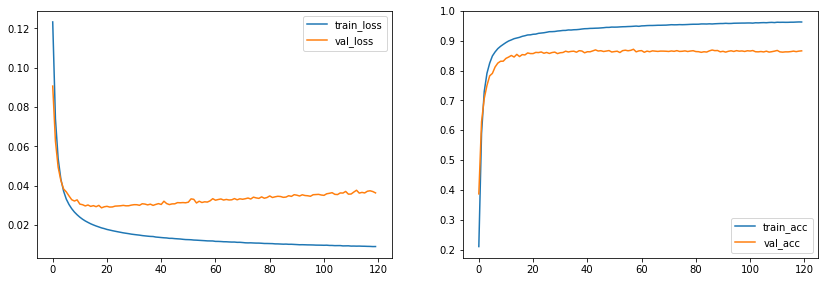

In [61]:
# New Optimizer Adam

# Definition Topologie des Netzes
three_layer_mlp = Sequential()
three_layer_mlp.add(Dense(86, activation ='relu', input_dim=1024))
three_layer_mlp.add(Dense(43, activation='softmax'))

#Lernprozess konfigurieren
three_layer_mlp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Modell trainieren
three_layer_mlp_history = three_layer_mlp.fit(x_train_gray, y_train_gray, 
          epochs=120, #Anzahl Trainingsepochen
          batch_size=200, #Batch-Size
          verbose=1,  
          validation_data=(x_test_gray, y_test_gray)) #print Ausgabe des Trainingsverlaufes 0=nein 1=ja

#plt.plot(dnn_no_dropout_history.history['accuracy'], label='train_acc')
#plt.plot(dnn_no_dropout_history.history['val_accuracy'], label='val_acc')
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.plot(three_layer_mlp_history.history['loss'], label='train_loss')
plt.plot(three_layer_mlp_history.history['val_loss'], label='val_loss')
plt.legend(['train_loss', 'val_loss'])

plt.subplot(222)
plt.plot(three_layer_mlp_history.history['accuracy'], label='train_acc')
plt.plot(three_layer_mlp_history.history['val_accuracy'], label='val_acc')
plt.legend(['train_acc', 'val_acc'])